In [ ]:
library(readxl)

In [ ]:
share <- read_excel("/content/shareprice.xlsx")

In [ ]:
View(share)

Date,N225,BVSP,SSCI
<dttm>,<dbl>,<dbl>,<dbl>
2016-01-04,17767.34,46179,2302.280
2016-01-05,17697.96,47065,2290.437
2016-01-06,17218.96,46884,2337.871
2016-01-07,17715.63,46517,2373.030
2016-01-08,17240.95,46847,2391.076
2016-01-12,17147.11,47248,2420.178
2016-01-13,16955.57,47436,2430.971
2016-01-14,17048.37,48139,2430.737
2016-01-15,16416.19,48150,2420.396


In [ ]:
attach(share)

In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
library(forecast)

In [ ]:
install.packages("tseries")
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



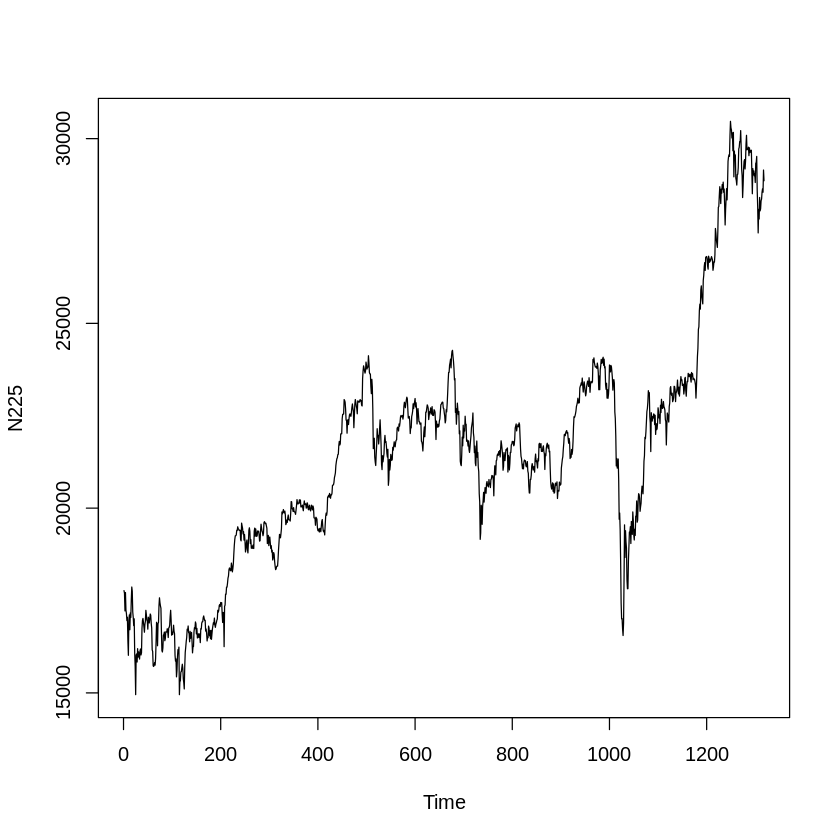

In [ ]:
plot.ts(N225)

In [ ]:
adf.test(N225)


	Augmented Dickey-Fuller Test

data:  N225
Dickey-Fuller = -2.1925, Lag order = 10, p-value = 0.4968
alternative hypothesis: stationary


In [ ]:
rn225 = diff(log(N225))

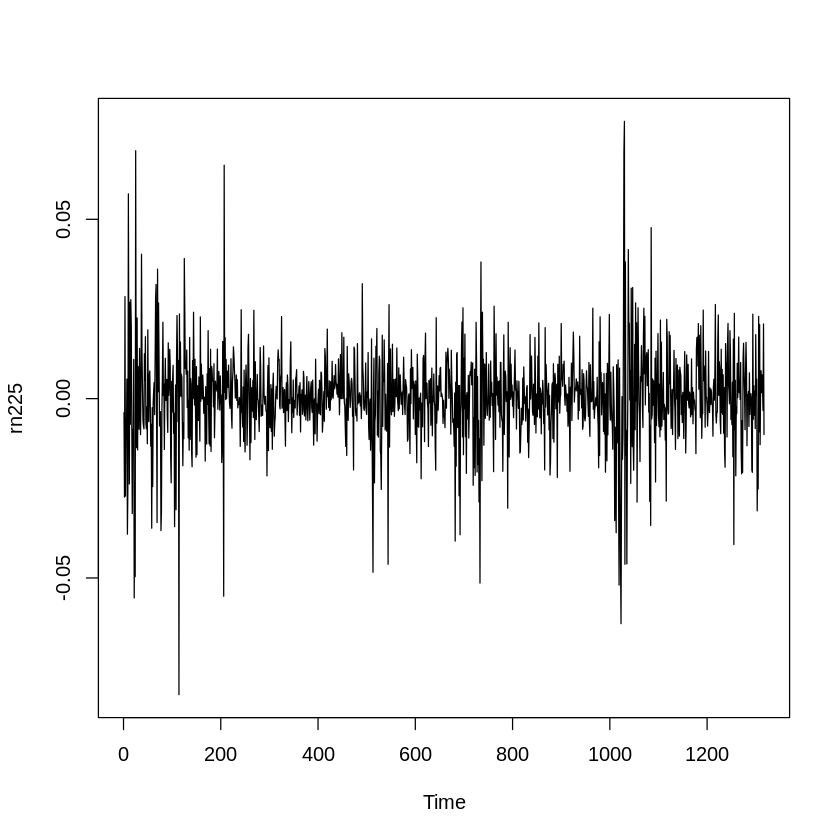

In [ ]:
plot.ts(rn225)

In [ ]:
adf.test(rn225)

Warning message in adf.test(rn225):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  rn225
Dickey-Fuller = -11.553, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [ ]:
auto.arima(rn225)

Series: rn225 
ARIMA(2,0,1) with zero mean 

Coefficients:
          ar1     ar2     ma1
      -0.7760  0.0367  0.7633
s.e.   0.1389  0.0315  0.1365

sigma^2 = 0.0001656:  log likelihood = 3865.54
AIC=-7723.09   AICc=-7723.06   BIC=-7702.35

In [ ]:
modelrn225 = arima(rn225, order = c(2,0,1))
modelrn225


Call:
arima(x = rn225, order = c(2, 0, 1))

Coefficients:
          ar1     ar2     ma1  intercept
      -0.7621  0.0375  0.7488      4e-04
s.e.   0.1498  0.0314  0.1478      4e-04

sigma^2 estimated as 0.0001651:  log likelihood = 3866.07,  aic = -7722.13

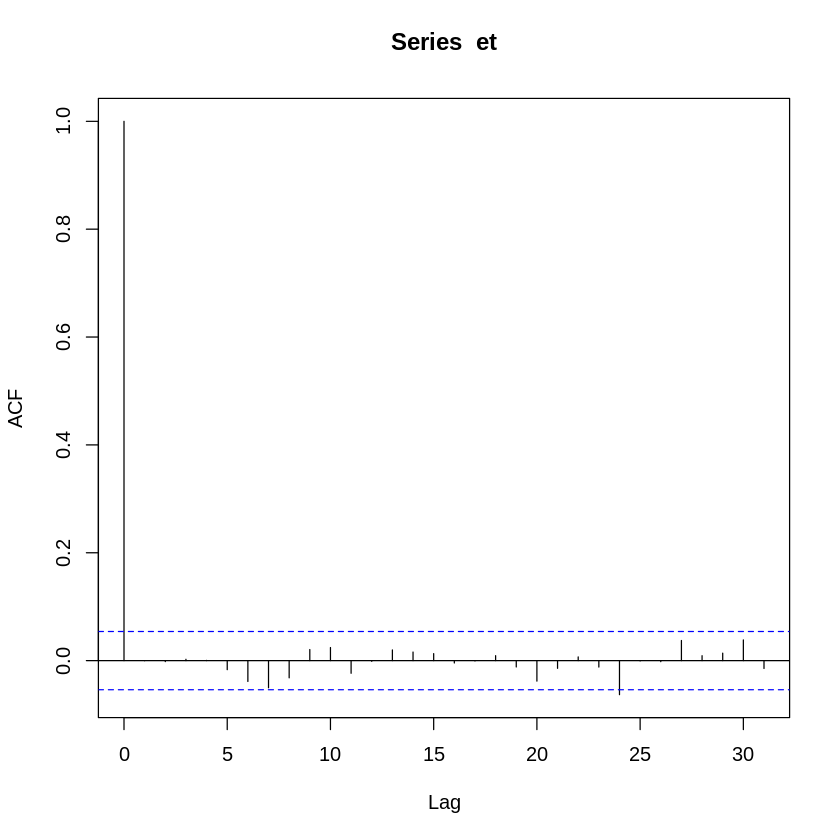

In [ ]:
et = residuals(modelrn225)
acf(et)

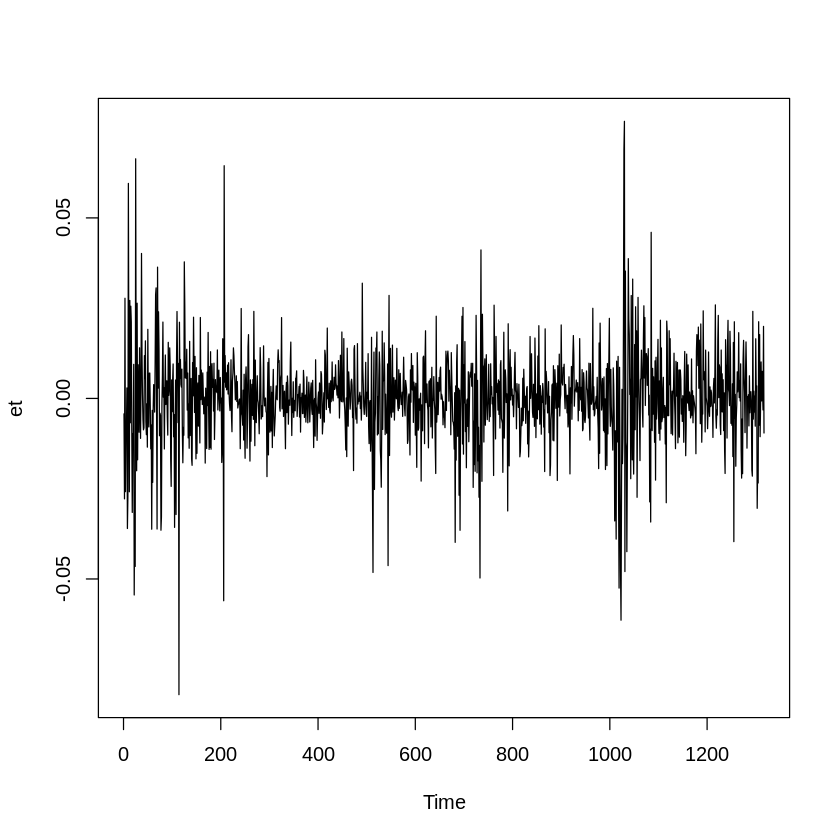

In [ ]:
plot.ts(et)

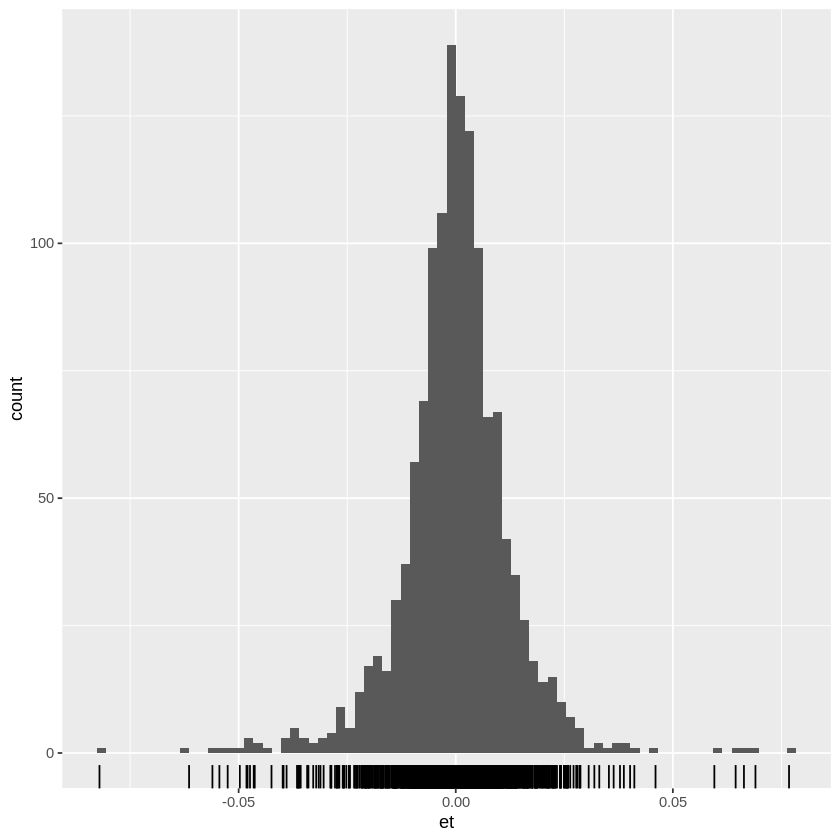

In [ ]:
gghistogram(et)

In [ ]:
Box.test(et, lag = 10, type = c("Box-Pierce", "Ljung-Box"), fitdf = 3)


	Box-Pierce test

data:  et
X-squared = 8.3525, df = 7, p-value = 0.3025


In [ ]:
forecastrn225 = forecast(modelrn225, h=10)
forecastrn225

     Point Forecast       Lo 80      Hi 80       Lo 95      Hi 95
1318   1.857562e-03 -0.01460965 0.01832477 -0.02332687 0.02704199
1319  -1.150671e-03 -0.01761935 0.01531801 -0.02633734 0.02403600
1320   1.586083e-03 -0.01490132 0.01807348 -0.02362922 0.02680139
1321  -6.125461e-04 -0.01711111 0.01588602 -0.02584493 0.02461983
1322   1.165781e-03 -0.01534012 0.01767168 -0.02407782 0.02640938
1323  -2.720301e-04 -0.01678272 0.01623866 -0.02552296 0.02497890
1324   8.904937e-04 -0.01562333 0.01740432 -0.02436522 0.02614621
1325  -4.944860e-05 -0.01656532 0.01646642 -0.02530829 0.02520940
1326   7.105286e-04 -0.01580668 0.01722774 -0.02455036 0.02597142
1327   9.605964e-05 -0.01642202 0.01661414 -0.02516617 0.02535829

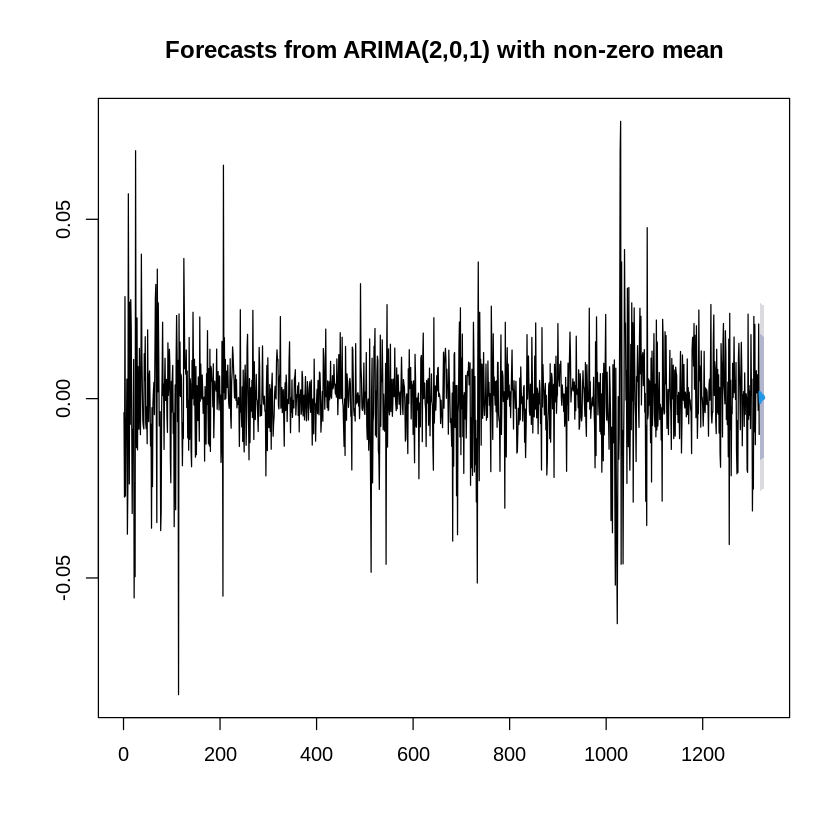

In [ ]:
plot(forecastrn225)

In [ ]:
modelrn225 = arima(rn225[1:1311], order = c(2,0,1))
forecastrn225 = forecast(modelrn225, h=6)

In [ ]:
forecastrn225

     Point Forecast       Lo 80      Hi 80       Lo 95      Hi 95
1312   0.0022513863 -0.01423224 0.01873501 -0.02295814 0.02746091
1313  -0.0007482193 -0.01723308 0.01573664 -0.02595963 0.02446319
1314   0.0012611950 -0.01524351 0.01776590 -0.02398057 0.02650296
1315  -0.0003530077 -0.01686897 0.01616295 -0.02561199 0.02490597
1316   0.0009277124 -0.01559539 0.01745081 -0.02434219 0.02619762
1317  -0.0000892166 -0.01661682 0.01643838 -0.02536600 0.02518757

In [ ]:
tail(rn225)

[1]  0.001650575  0.006654128  0.003084439 -0.003258535  0.020812427
[6] -0.009975350

In [ ]:
accuracy(modelrn225)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-4.248539e-06,0.01286224,0.008776083,NaN,Inf,0.6871469,-8.937605e-05


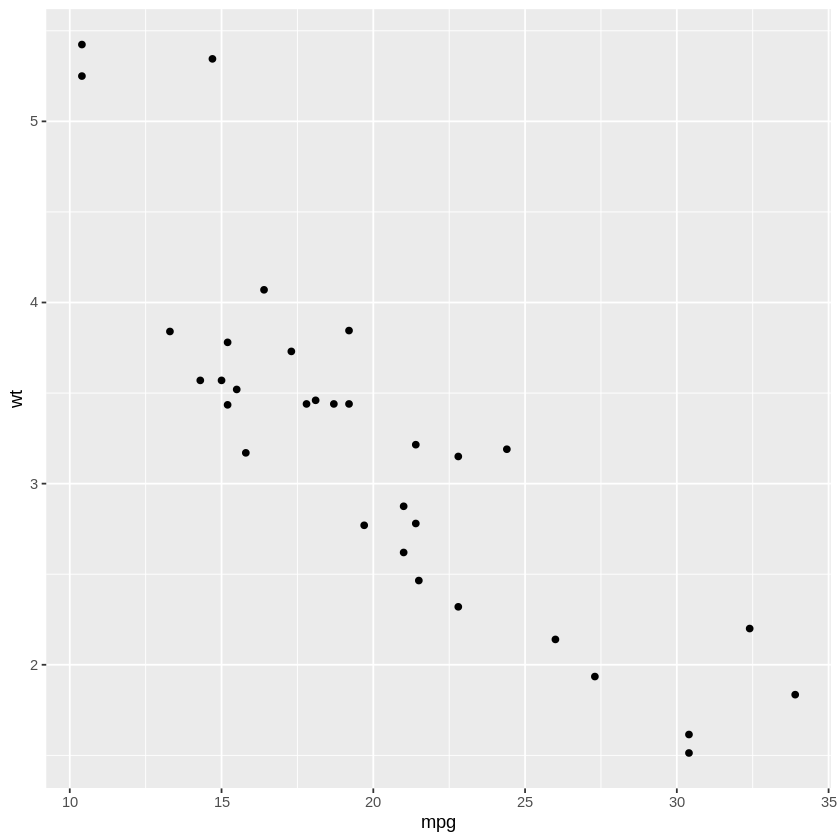